In [1]:
from autometrics.dataset.datasets import HelpSteer2
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
import dspy
import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer2()

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Answer the user query as a helpful chatbot assistant.", proposer_model=llama31_70b, judge_api_base="http://jagupard36:8000/v1")

In [6]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [7]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column))

In [8]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [9]:
for metric in new_metrics_final:
    metric.display()

,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Completeness**: The output's completeness in terms of covering all necessary aspects of the task or question, providing a comprehensive response.","A score of 1 indicates that the output is severely incomplete, omitting crucial information or failing to address key aspects of the task or question. The response may be vague, lacking in detail, or irrelevant to the topic at hand.","A score of 2 indicates that the output is somewhat incomplete, missing some important details or failing to fully address certain aspects of the task or question. While the response may provide some relevant information, it lacks depth or clarity, making it difficult to fully understand the topic.","A score of 3 indicates that the output is partially complete, covering some but not all necessary aspects of the task or question. The response may provide some relevant information, but it may also omit important details or fail to fully address certain aspects of the topic.","A score of 4 indicates that the output is mostly complete, covering most necessary aspects of the task or question. The response provides relevant information, addresses key points, and demonstrates a good understanding of the topic. However, it may still lack some minor details or nuances.","A score of 5 indicates that the output is fully complete, covering all necessary aspects of the task or question. The response provides comprehensive and detailed information, addresses all relevant points, and demonstrates an excellent understanding of the topic."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Engagement**: The output's ability to engage the user, using a tone and language that is approachable, friendly, and motivating.","A score of 1 indicates that the output is completely unengaging, using a tone and language that is dry, formal, and unapproachable. The output may come across as robotic or dismissive, failing to acknowledge the user's concerns or needs.","A score of 2 indicates that the output is somewhat unengaging, using a tone and language that is somewhat formal and lacking in empathy. The output may provide some useful information, but it is presented in a way that is dry and uninteresting.","A score of 3 indicates that the output is neutral, using a tone and language that is neither particularly engaging nor unengaging. The output may provide some useful information, but it is presented in a way that is straightforward and lacking in personality.","A score of 4 indicates that the output is engaging, using a tone and language that is approachable, friendly, and motivating. The output demonstrates a clear understanding of the user's needs and concerns, and responds in a way that is empathetic and informative.","A score of 5 indicates that the output is highly engaging, using a tone and language that is highly approachable, friendly, and motivating. The output demonstrates a deep understanding of the user's needs and concerns, and responds in a way that is highly empathetic, informative, and engaging."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Relevance**: The output's ability to address the task or question at hand, providing relevant information and insights.","**Score 1: Irrelevant**: The output is completely unrelated to the task or question, providing no useful information or insights. It may be off-topic, nonsensical, or even harmful.","**Score 2: Somewhat Irrelevant**: The output is partially related to the task or question but lacks focus, clarity, or coherence. It may provide some relevant information but is mostly irrelevant or unhelpful.","**Score 3: Partially Relevant**: The output is somewhat relevant to the task or question, providing some useful information or insights. However, it may lack depth, clarity, or completeness, and may not fully address the user's needs.","**Score 4: Mostly Relevant**: The output is largely relevant to the task or question, providing accurate and useful information, insights, or solutions. It may have some minor flaws or omissions but overall addresses the user's needs effectively.","**Score 5: Highly Relevant**: The output is extremely relevant to the task or question, providing comprehensive, accurate, and insightful information, solutions, or engagement. It fully addresses the user's needs and is of high quality."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Accuracy**: The output's accuracy in terms of facts, data, and information, ensuring that the provided information is correct and trustworthy.","A score of 1 indicates that the output is completely inaccurate, containing false or misleading information. This may be due to a lack of understanding of the topic, incorrect assumptions, or failure to verify information against reliable sources.","A score of 2 indicates that the output contains some inaccuracies, but also provides some correct information. However, the incorrect information may outweigh the correct information, making the output unreliable. This may be due to incomplete knowledge, incorrect assumptions, or failure to verify information against reliable sources.","A score of 3 indicates that the output is partially accurate, containing a mix of correct and incorrect information. The correct information may be sufficient to provide some value, but the incorrect information may still cause confusion or mislead the user. This may be due to incomplete knowledge, incorrect assumptions, or failure to verify information against reliable sources.","A score of 4 indicates that the output is mostly accurate, containing some minor errors or inaccuracies. The correct information is sufficient to provide significant value, and the minor errors do not significantly impact the overall accuracy of the output. This may be due to a good understanding of the topic, correct assumptions, and verification of information against reliable sources.","A score of 5 indicates that the output is completely accurate, containing no errors or inaccuracies. The information provided is trustworthy, reliable, and verifiable against established knowledge or reliable sources. This demonstrates a thorough understanding of the topic, correct assumptions, and rigorous verification of information."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity**: The output's clarity in terms of language, structure, and organization, making it easy for the user to understand and follow.","A score of 1 indicates that the output is very unclear. The language is complex and difficult to understand, the structure is disorganized, and the organization is poor, making it challenging for the user to follow the response.","A score of 2 indicates that the output is unclear. The language is somewhat complex, the structure is not well-organized, and the organization is fair, making it somewhat difficult for the user to understand the response.","A score of 3 indicates that the output is neutral in terms of clarity. The language is average, the structure is somewhat organized, and the organization is decent, making it moderately easy for the user to follow the response.","A score of 4 indicates that the output is clear. The language is simple and concise, the structure is well-organized, and the organization is good, making it easy for the user to understand the response.","A score of 5 indicates that the output is very clear. The language is extremely simple and concise, the structure is highly organized, and the organization is excellent, making it very easy for the user to follow the response."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Understanding**: The chatbot's ability to understand the user's query and provide relevant information. These axes of variation can help explain the differences in the quality of the outputs between the good and bad examples. A chatbot that scores high on these axes is likely to provide high-quality outputs, while a chatbot that scores low on these axes is likely to provide low-quality outputs.","A score of 1 indicates that the chatbot has little to no understanding of the user's query. The chatbot's response may be completely unrelated to the user's question, or it may provide inaccurate or incomplete information. The chatbot may also struggle to identify the key concepts and entities involved in the user's query, leading to a response that is not relevant or informative.","A score of 2 indicates that the chatbot has some understanding of the user's query, but its response is still limited or inaccurate. The chatbot may be able to identify some of the key concepts and entities involved in the user's query, but it may struggle to provide a complete or thorough response. The chatbot's response may also contain some inaccuracies or irrelevant information.","A score of 3 indicates that the chatbot has a moderate level of understanding of the user's query. The chatbot is able to identify the key concepts and entities involved in the user's query and provide a response that is generally relevant and informative. However, the chatbot's response may still contain some inaccuracies or incomplete information, and it may not fully address the user's question.","A score of 4 indicates that the chatbot has a strong understanding of the user's query. The chatbot is able to accurately identify the key concepts and entities involved in the user's query and provide a response that is complete, thorough, and relevant. The chatbot's response may contain some minor inaccuracies or incomplete information, but overall it is able to provide a high-quality response that addresses the user's question.","A score of 5 indicates that the chatbot has an exceptional understanding of the user's query. The chatbot is able to accurately identify the key concepts and entities involved in the user's query and provide a response that is complete, thorough, and highly relevant. The chatbot's response is accurate, informative, and fully addresses the user's question, demonstrating a deep understanding of the user's needs and context."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Organization and structure**: The degree to which the response is well-organized and structured in a logical and coherent manner. These axes of variation can help explain the key differences between good and bad chatbot responses and provide a framework for evaluating and improving chatbot performance.,"A score of 1 indicates that the response is poorly organized and lacks a clear structure. The information presented is disjointed and confusing, making it difficult for the user to understand. The language is unclear, and the response lacks logical transitions between ideas.","A score of 2 indicates that the response is somewhat organized, but lacks a clear and logical structure. The information presented is somewhat disjointed, and the language is not entirely clear. The response may lack logical transitions between ideas, and may include unnecessary tangents or digressions.","A score of 3 indicates that the response is adequately organized and structured. The information presented is clear and concise, and the language is generally easy to understand. The response may lack some logical transitions between ideas, but is generally easy to follow.","A score of 4 indicates that the response is well-organized and structured. The information presented is clear and concise, and the language is easy to understand. The response includes logical transitions between ideas, and is free of unnecessary tangents or digressions.","A score of 5 indicates that the response is exceptionally well-organized and structured. The information presented is clear, concise, and logically organized, making it easy for the user to understand and follow. The language is clear and concise, and the response includes smooth and logical transitions between ideas."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,**Contextual understanding**: The degree to which the response demonstrates an understanding of the user's context and provides context-specific information.,"A score of 1 indicates that the response demonstrates little to no understanding of the user's context. The response may be generic, vague, or completely off-topic. It may also fail to provide any relevant information or demonstrate a clear understanding of the topic.","A score of 2 indicates that the response demonstrates some understanding of the user's context, but it is limited or incomplete. The response may provide some relevant information, but it may also be vague or lack clarity. It may also demonstrate some understanding of the topic, but it may not be thorough or accurate.","A score of 3 indicates that the response demonstrates a good understanding of the user's context and provides relevant information. The response is clear and concise, and it demonstrates a good understanding of the topic. However, it may lack some depth or nuance, and it may not fully address the user's query.","A score of 4 indicates that the response demonstrates a strong understanding of the user's context and provides highly relevant information. The response is clear, concise, and well-organized, and it demonstrates a thorough understanding of the topic. It may also provide some additional insights or perspectives that are relevant to the user's query.","A score of 5 indicates that the response demonstrates an exceptional understanding of the user's context and provides highly relevant and accurate information. The response is clear, concise, and well-organized, and it demonstrates a deep and nuanced understanding of the topic. It may also provide some additional insights or perspectives that are highly relevant to the user's query and demonstrate a high level of expertise."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Relevance and Accuracy**: The ability of the output to provide relevant and accurate information, addressing the task and instructions.","Score 1: The output is completely irrelevant or inaccurate, failing to address the task or instructions. The information provided is incorrect, misleading, or unrelated to the topic.","Score 2: The output is somewhat irrelevant or inaccurate, partially addressing the task or instructions. The information provided is partially correct but contains significant errors or inaccuracies.","Score 3: The output is moderately relevant and accurate, adequately addressing the task or instructions. The information provided is generally correct but may contain some minor errors or inaccuracies.","Score 4: The output is highly relevant and accurate, effectively addressing the task or instructions. The information provided is mostly correct, with only minor errors or inaccuracies.","Score 5: The output is extremely relevant and accurate, thoroughly addressing the task or instructions. The information provided is entirely correct, with no errors or inaccuracies."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Clarity and Coherence**: The clarity and coherence of the language used in the output, making it easy to understand and follow.","A score of 1 indicates that the output is extremely unclear and incoherent, making it difficult or impossible to understand the intended message. The language is likely to be ambiguous, confusing, or riddled with errors, rendering the output unusable.","A score of 2 indicates that the output is unclear and lacks coherence in some areas. While the overall message may be discernible, the language is likely to be ambiguous or confusing in certain sections, making it challenging to follow the author's intent.","A score of 3 indicates that the output is somewhat clear and coherent, but may lack precision or clarity in certain areas. The language is generally understandable, but may contain some ambiguities or minor errors that do not significantly impede comprehension.","A score of 4 indicates that the output is clear and coherent, with minor exceptions. The language is generally precise and easy to follow, but may contain some minor errors or ambiguities that do not significantly impact the overall message.","A score of 5 indicates that the output is extremely clear and coherent, with precise and concise language that effectively conveys the intended message. The output is easy to follow, and the language is free of errors and ambiguities, making it highly effective in communicating the author's intent."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Ability to Follow Instructions**: The ability of the output to follow instructions and address the task, demonstrating an understanding of the requirements.","A score of 1 indicates that the output fails to follow instructions, demonstrating a lack of understanding of the task requirements. The response may be unrelated to the task, or it may address only a minor aspect of the instructions.","A score of 2 indicates that the output partially follows instructions, showing some understanding of the task requirements. However, the response may be incomplete, inaccurate, or address only a limited aspect of the instructions.","A score of 3 indicates that the output generally follows instructions, demonstrating a good understanding of the task requirements. The response may address most aspects of the instructions, but may lack some details or contain minor inaccuracies.","A score of 4 indicates that the output closely follows instructions, demonstrating a strong understanding of the task requirements. The response accurately addresses most aspects of the instructions, with only minor errors or omissions.","A score of 5 indicates that the output perfectly follows instructions, demonstrating an excellent understanding of the task requirements. The response accurately and completely addresses all aspects of the instructions, with no errors or omissions."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Formatting and Organization**: The proper use of formatting and organization in the output, making it easy to read and comprehend.","A score of 1 indicates that the output lacks proper formatting and organization, making it difficult to read and comprehend. The text may be disorganized, with no clear structure or headings, and may contain excessive use of jargon or technical terms that are not clearly explained.","A score of 2 indicates that the output has some basic formatting and organization, but it is not consistent or effective. The text may have some headings or subheadings, but they may not be clearly defined or consistently used. The language may be somewhat concise, but it may also be overly technical or contain unnecessary jargon.","A score of 3 indicates that the output has a clear and organized structure, but it may lack some polish or refinement. The text may have clear headings and subheadings, but the formatting may not be consistent throughout. The language may be concise and straightforward, but it may also contain some minor errors or awkward phrasing.","A score of 4 indicates that the output has a clear and organized structure, with effective use of formatting and language. The text may have clear headings and subheadings, consistent spacing between paragraphs, and concise language that is easy to understand. However, there may be some minor areas where the formatting could be improved, such as the inclusion of more visual elements or clearer section breaks.","A score of 5 indicates that the output has a clear and organized structure, with exceptional use of formatting and language. The text may have clear headings and subheadings, consistent spacing between paragraphs, and concise language that is easy to understand. The formatting is polished and refined, with effective use of visual elements and clear section breaks. The language is engaging and accessible, making the text a pleasure to read."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Overall Quality**: The overall quality of the output, taking into account the above factors and the level of expertise demonstrated.","A score of 1 is given to a response that lacks relevant information, contains significant inaccuracies, or is incoherent. The response may not address the user's query, may provide irrelevant information, or may be difficult to understand due to poor organization or grammar.","A score of 2 is given to a response that provides some relevant information but lacks detail, contains some inaccuracies, or is somewhat incoherent. The response may address the user's query but may not provide enough information to be helpful, may contain some errors or inaccuracies, or may be somewhat difficult to understand due to poor organization or grammar.","A score of 3 is given to a response that provides relevant information, is mostly accurate, and is coherent. The response addresses the user's query, provides enough information to be helpful, and is well-organized and easy to understand. However, the response may lack some detail or contain minor errors.","A score of 4 is given to a response that provides detailed and accurate information, is well-organized, and is coherent. The response thoroughly addresses the user's query, provides all necessary information, and is easy to understand due to good organization and grammar.","A score of 5 is given to a response that provides comprehensive and accurate information, is well-organized, and is coherent. The response thoroughly addresses the user's query, provides all necessary information, and is easy to understand due to excellent organization and grammar. The response demonstrates a high level of expertise and is of exceptional quality."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Coherence**: The extent to which the output is logically consistent and well-structured, with good examples showing a clear and organized thought process and bad examples being disjointed or hard to follow.","A score of 1 indicates that the output is completely incoherent, with no discernible structure or logical consistency. The language is unclear or confusing, and the response is difficult to follow.","A score of 2 indicates that the output is somewhat incoherent, with some attempt at structure and logical consistency, but with significant flaws. The language is often unclear or confusing, and the response is difficult to follow in places.","A score of 3 indicates that the output is partially coherent, with some evidence of structure and logical consistency, but with some notable flaws. The language is generally clear, but there may be some unclear or confusing statements.","A score of 4 indicates that the output is mostly coherent, with a clear structure and logical consistency, but with some minor flaws. The language is clear and concise, with only occasional unclear or confusing statements.","A score of 5 indicates that the output is completely coherent, with a clear and logical structure, and no discernible flaws. The language is clear and concise, and the response is easy to follow."


In [10]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Processing Items:  46%|████▌     | 460/1000 [00:01<00:02, 216.32it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  52%|█████▏    | 521/1000 [00:02<00:03, 145.56it/s]

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 385.26it/s]


Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 407.15it/s]


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  24%|██▍       | 245/1000 [00:00<00:01, 406.34it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  33%|███▎      | 332/1000 [00:01<00:03, 210.34it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10


Processing Items:  40%|████      | 404/1000 [00:01<00:05, 118.91it/s]

Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 378.23it/s]


Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  35%|███▍      | 349/1000 [00:00<00:01, 328.33it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items:  47%|████▋     | 470/1000 [00:01<00:03, 137.84it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  42%|████▏     | 419/1000 [00:01<00:02, 246.86it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items:  51%|█████     | 507/1000 [00:02<00:04, 101.08it/s]

Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  54%|█████▍    | 542/1000 [00:01<00:01, 285.61it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:  61%|██████    | 612/1000 [00:02<00:02, 156.31it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 382.98it/s]


Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:   9%|▉         | 94/1000 [00:00<00:01, 809.44it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  23%|██▎       | 227/1000 [00:00<00:02, 345.27it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10


Processing Items:  35%|███▍      | 349/1000 [00:01<00:03, 163.66it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10


Processing Items:  40%|███▉      | 395/1000 [00:02<00:08, 70.77it/s] 

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 387.58it/s]


Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 404.25it/s]


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 407.12it/s]


Retrying failed batches: Attempt 1/10


Processing Items:  11%|█▏        | 113/1000 [00:00<00:00, 1057.40it/s]

Retrying failed batches: Attempt 2/10


Processing Items:  22%|██▏       | 219/1000 [00:00<00:01, 459.31it/s] 

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items:  34%|███▎      | 336/1000 [00:00<00:01, 398.43it/s]

Retrying failed batches: Attempt 6/10


Processing Items:  38%|███▊      | 381/1000 [00:00<00:01, 371.34it/s]

Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10


Processing Items:  45%|████▌     | 450/1000 [00:01<00:03, 148.17it/s]

Retrying failed batches: Attempt 10/10


Processing Items:  38%|███▊      | 378/1000 [00:01<00:02, 244.39it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items:  43%|████▎     | 427/1000 [00:01<00:04, 122.93it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10


Processing Items: 100%|██████████| 1000/1000 [00:02<00:00, 370.20it/s]


Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  67%|██████▋   | 699/1038 [00:00<00:00, 4732.88it/s]

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10


Processing Items: 100%|██████████| 1038/1038 [00:01<00:00, 1028.60it/s]

Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10



Processing Items:  62%|██████▏   | 640/1038 [00:02<00:03, 118.43it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10


Processing Items: 100%|██████████| 1038/1038 [00:02<00:00, 397.71it/s]


Retrying failed batches: Attempt 3/10Retrying failed batches: Attempt 7/10

Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 10/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1038/1038 [00:02<00:00, 396.04it/s]


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items:  40%|████      | 416/1038 [00:01<00:02, 309.33it/s] 

Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10


Processing Items:  47%|████▋     | 488/1038 [00:01<00:02, 197.61it/s]

Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10


Processing Items: 100%|██████████| 1038/1038 [00:02<00:00, 401.53it/s]


Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1038/1038 [00:02<00:00, 377.95it/s]


Retrying failed batches: Attempt 1/10
Retrying failed batches: Attempt 2/10
Retrying failed batches: Attempt 3/10
Retrying failed batches: Attempt 4/10
Retrying failed batches: Attempt 5/10
Retrying failed batches: Attempt 6/10
Retrying failed batches: Attempt 7/10
Retrying failed batches: Attempt 8/10
Retrying failed batches: Attempt 9/10
Retrying failed batches: Attempt 10/10


Processing Items: 100%|██████████| 1038/1038 [00:02<00:00, 437.08it/s]


In [11]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Coherence_prometheus-7b-v2.0_rubric (0.15687595640050012),Clarity and Coherence_prometheus-7b-v2.0_rubric (0.19127402967611642),Clarity_prometheus-7b-v2.0_rubric (0.18255947326239605),Completeness_prometheus-7b-v2.0_rubric (0.17212476508856978),Ability to Follow Instructions_prometheus-7b-v2.0_rubric (0.18735087385508073)
correctness,Relevance and Accuracy_prometheus-7b-v2.0_rubric (0.14914250035890175),Completeness_prometheus-7b-v2.0_rubric (0.17272444775433332),Clarity and Coherence_prometheus-7b-v2.0_rubric (0.19427450152736886),Clarity_prometheus-7b-v2.0_rubric (0.17830890484196288),Coherence_prometheus-7b-v2.0_rubric (0.15568936791733665)
coherence,Clarity and Coherence_prometheus-7b-v2.0_rubric (0.13569170885531806),Clarity_prometheus-7b-v2.0_rubric (0.16100423655031235),Organization and structure_prometheus-7b-v2.0_rubric (0.10443107222555621),Completeness_prometheus-7b-v2.0_rubric (0.08614505304730183),Overall Quality_prometheus-7b-v2.0_rubric (0.09951781805270611)
complexity,Contextual understanding_prometheus-7b-v2.0_rubric (0.20118480683026038),Completeness_prometheus-7b-v2.0_rubric (0.23491192016480314),Ability to Follow Instructions_prometheus-7b-v2.0_rubric (0.1834853734830165),Relevance and Accuracy_prometheus-7b-v2.0_rubric (0.18703466141145053),Overall Quality_prometheus-7b-v2.0_rubric (0.2612775050209083)
verbosity,Contextual understanding_prometheus-7b-v2.0_rubric (0.28819131798988334),Understanding_prometheus-7b-v2.0_rubric (0.2521788362576546),Completeness_prometheus-7b-v2.0_rubric (0.268251513771707),Engagement_prometheus-7b-v2.0_rubric (0.13784880801743063),Relevance_prometheus-7b-v2.0_rubric (0.1904989298320715)


In [12]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


In [13]:
train.get_metric_columns()

['Completeness_prometheus-7b-v2.0_rubric',
 'Engagement_prometheus-7b-v2.0_rubric',
 'Relevance_prometheus-7b-v2.0_rubric',
 'Accuracy_prometheus-7b-v2.0_rubric',
 'Clarity_prometheus-7b-v2.0_rubric',
 'Understanding_prometheus-7b-v2.0_rubric',
 'Organization and structure_prometheus-7b-v2.0_rubric',
 'Contextual understanding_prometheus-7b-v2.0_rubric',
 'Relevance and Accuracy_prometheus-7b-v2.0_rubric',
 'Clarity and Coherence_prometheus-7b-v2.0_rubric',
 'Ability to Follow Instructions_prometheus-7b-v2.0_rubric',
 'Formatting and Organization_prometheus-7b-v2.0_rubric',
 'Overall Quality_prometheus-7b-v2.0_rubric',
 'Coherence_prometheus-7b-v2.0_rubric']

In [14]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


In [15]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Rg_helpfulness_llm (0.22598998476067061),Rg_correctness_llm (0.2201446238418328),Coherence_prometheus-7b-v2.0_rubric (0.15687595640050012),Clarity and Coherence_prometheus-7b-v2.0_rubric (0.19127402967611642),Clarity_prometheus-7b-v2.0_rubric (0.18255947326239605)
correctness,Rg_helpfulness_llm (0.2257090341118524),Rg_correctness_llm (0.21981971741984954),Relevance and Accuracy_prometheus-7b-v2.0_rubric (0.14914250035890175),Completeness_prometheus-7b-v2.0_rubric (0.17272444775433332),Clarity and Coherence_prometheus-7b-v2.0_rubric (0.19427450152736886)
coherence,Rg_correctness_llm (0.16021749757773007),Rg_helpfulness_llm (0.1536918051846697),Clarity and Coherence_prometheus-7b-v2.0_rubric (0.13569170885531806),Clarity_prometheus-7b-v2.0_rubric (0.16100423655031235),Organization and structure_prometheus-7b-v2.0_rubric (0.10443107222555621)
complexity,Contextual understanding_prometheus-7b-v2.0_rubric (0.20118480683026038),Rg_complexity_llm (0.2891562284882241),Completeness_prometheus-7b-v2.0_rubric (0.23491192016480314),Ability to Follow Instructions_prometheus-7b-v2.0_rubric (0.1834853734830165),Relevance and Accuracy_prometheus-7b-v2.0_rubric (0.18703466141145053)
verbosity,Rg_verbosity_llm (0.31028816537078335),Contextual understanding_prometheus-7b-v2.0_rubric (0.28819131798988334),Rg_complexity_llm (0.31206161256224746),Understanding_prometheus-7b-v2.0_rubric (0.2521788362576546),Completeness_prometheus-7b-v2.0_rubric (0.268251513771707)


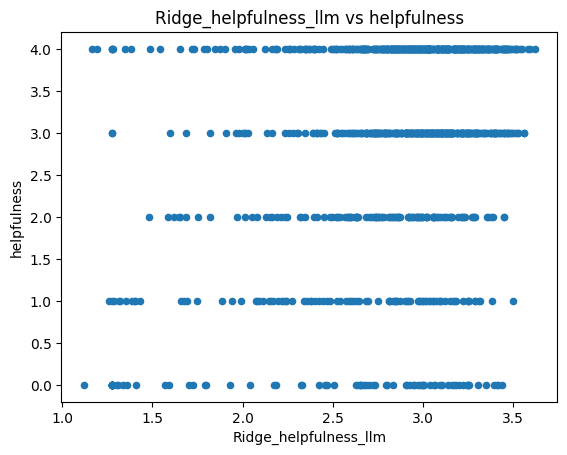

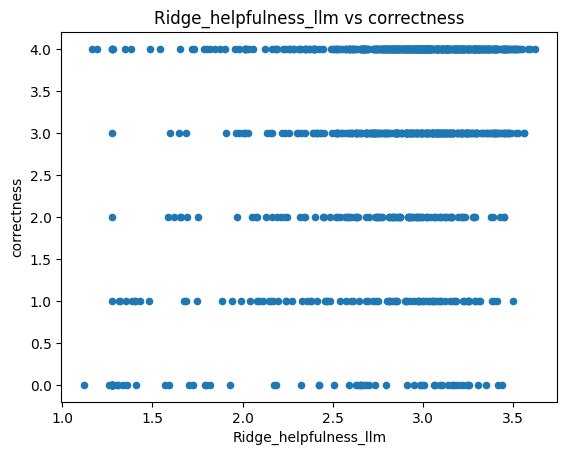

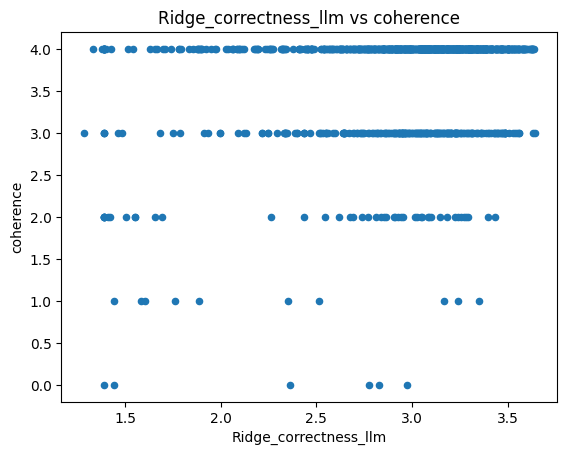

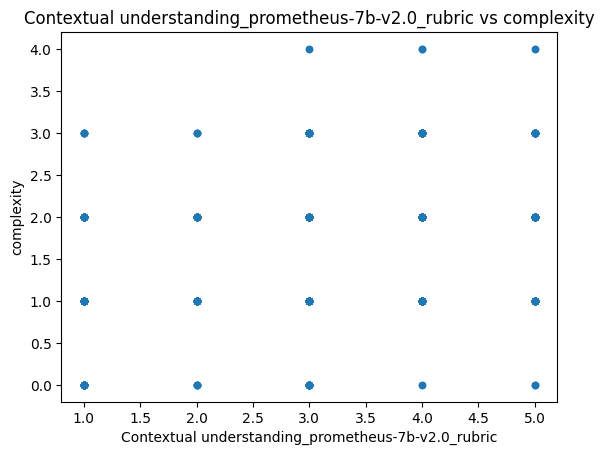

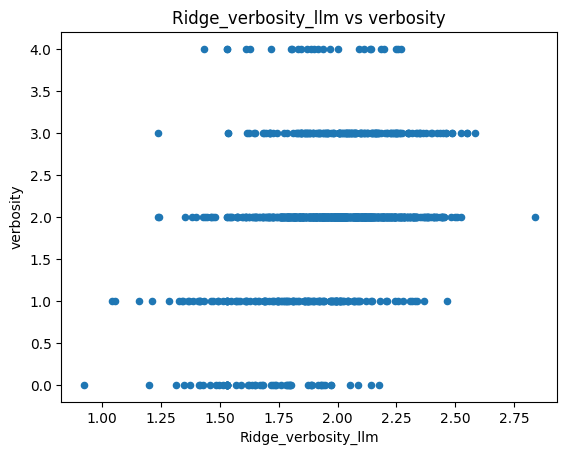

In [16]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
